In [1]:
import json

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
with open('result.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

df = pd.DataFrame(data['messages'])
df['msg_type'] = df['text_entities'].apply(lambda x: x[0]['type'] if isinstance(x, list) and len(x) > 0 else None)
df

,id,type,date,date_unixtime,actor,actor_id,action,title,members,text,...,media_spoiler,performer,inline_bot_buttons,duration,location_information,live_location_period_seconds,todo_list,completed,incompleted,msg_type
0,-999266404,service,2025-06-30T19:03:40,1751274220,Мотюша,user5132405907,create_group,Заебал ваш сломаный телефон,"[Мотюша, Илья Бибизянов, Няма Нямочкин, паша, ...",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,-999266403,message,2025-06-30T19:03:46,1751274226,NaN,NaN,NaN,NaN,NaN,Так блять,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
2,-999266402,message,2025-06-30T19:03:55,1751274235,NaN,NaN,NaN,NaN,NaN,Завтра супра в 20:30?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
3,-999266401,message,2025-06-30T19:04:07,1751274247,NaN,NaN,NaN,NaN,NaN,ну ща паша ответит,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
4,-999266400,message,2025-06-30T19:04:17,1751274257,NaN,NaN,NaN,NaN,NaN,ну по идее мало шансов что он не сможет,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160869,160992,message,2025-12-16T03:07:15,1765818435,NaN,NaN,NaN,NaN,NaN,для минимизации мсе цэшку берут просто средним,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
160870,160993,message,2025-12-16T03:07:28,1765818448,NaN,NaN,NaN,NaN,NaN,для мае медиану,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
160871,160994,message,2025-12-16T03:14:02,1765818842,NaN,NaN,NaN,NaN,NaN,бля вот бы дернуть маркдаун этой статьи,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain
160872,160995,message,2025-12-16T03:14:53,1765818893,NaN,NaN,NaN,NaN,NaN,а то почти 3 часа читал эту хуйню,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,plain


In [3]:
df = df[['from', 'date', 'date_unixtime', 'text', 'msg_type', 'from_id']]

In [4]:
df = df.dropna(subset=['from'])

In [5]:
df['from'].unique()

array(['Мотюша', 'Никита', 'Илья Бибизянов', 'Няма Нямочкин', 'ТимохаПро',
       'Анёна', 'паша', '/'], dtype=object)

In [6]:
df['from'] = df['from'].str.replace('/', 'паша')

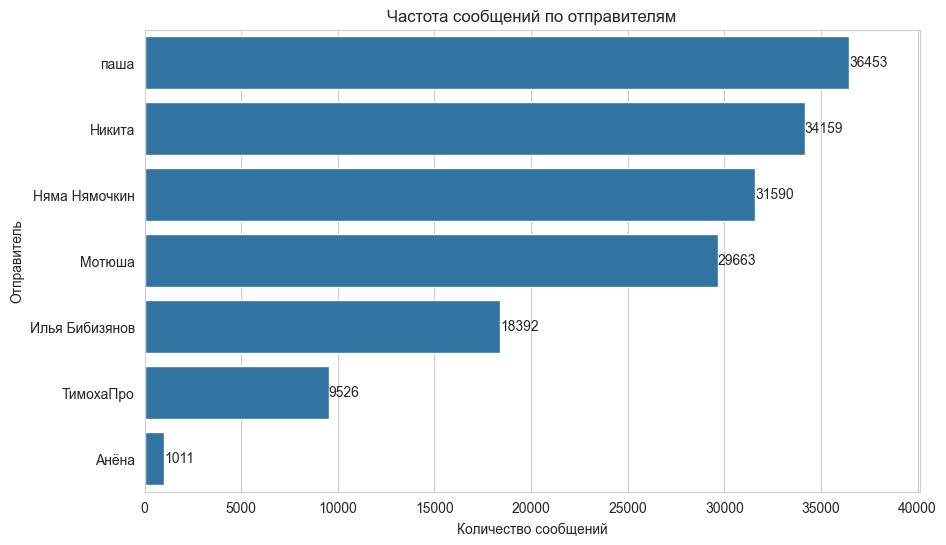

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='from', data=df, order=df['from'].value_counts().index)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.2, p.get_y() + p.get_height() / 2, str(int(width)),
            va='center', ha='left')

plt.xlabel('Количество сообщений')
plt.ylabel('Отправитель')
plt.title('Частота сообщений по отправителям')
plt.xlim(0, df['from'].value_counts().max() * 1.1)
plt.show()


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df[df['date'] < '2025-12-01']

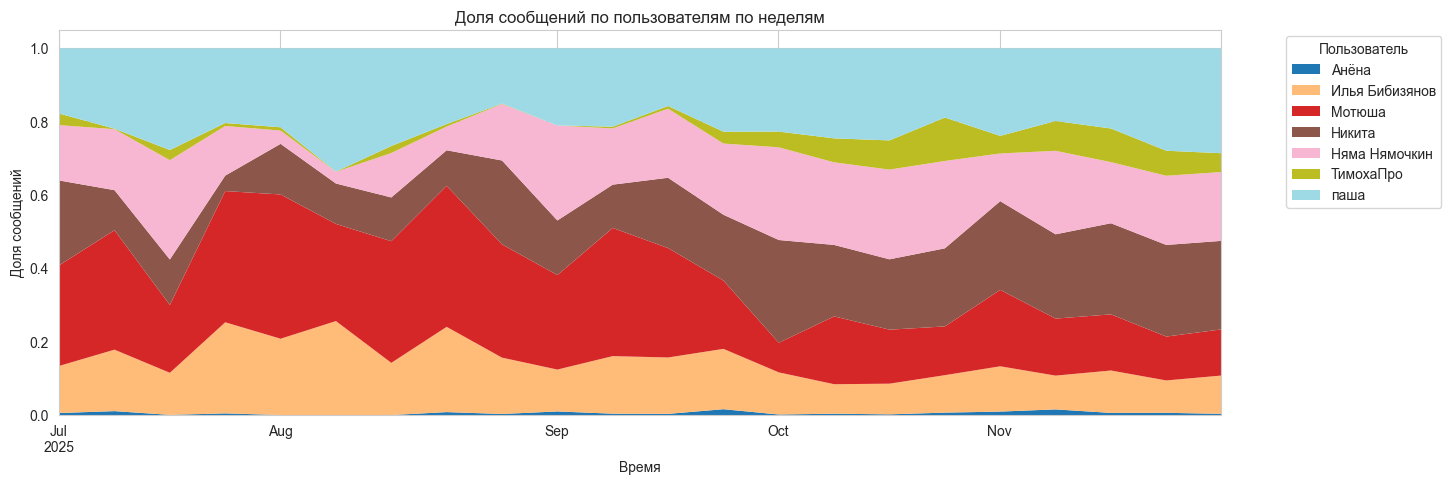

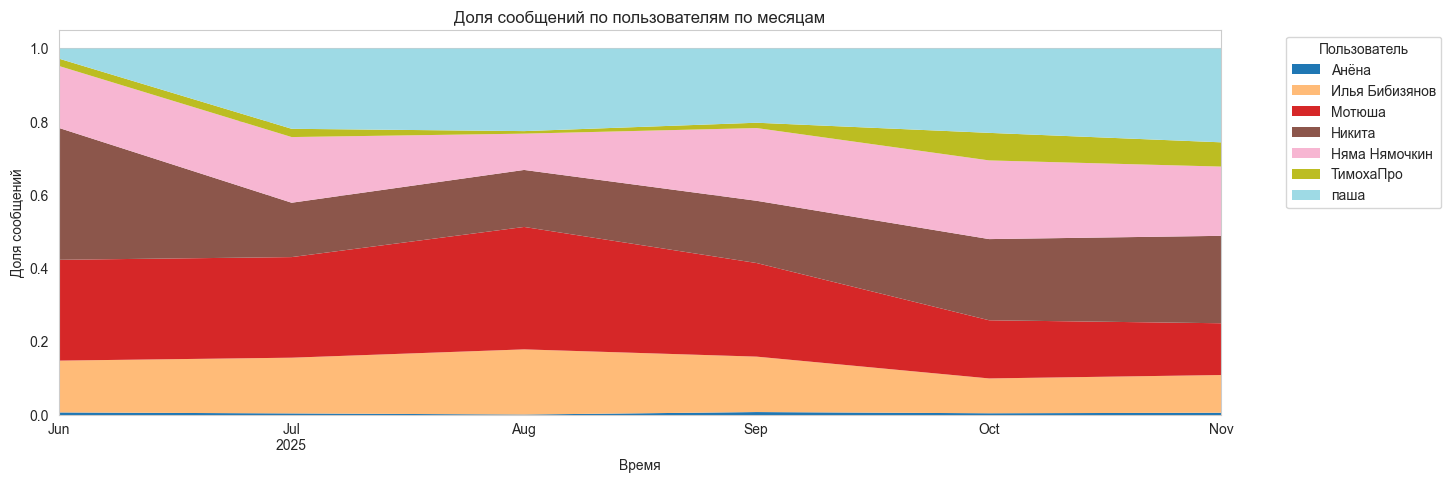

In [10]:
def plot_user_share(df, freq, title):
    grouped = df.groupby([pd.Grouper(key='date', freq=freq), 'from']).size().unstack(fill_value=0)
    grouped_pct = grouped.div(grouped.sum(axis=1), axis=0)

    grouped_pct.plot(kind='area', figsize=(15, 5), cmap='tab20', linewidth=0)
    plt.ylabel('Доля сообщений')
    plt.xlabel('Время')
    plt.title(title)
    plt.legend(title='Пользователь', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# По неделям
plot_user_share(df, 'W', 'Доля сообщений по пользователям по неделям')

# По месяцам
plot_user_share(df, 'ME', 'Доля сообщений по пользователям по месяцам')


# Красные точки на графиках это дни, когда 0 сообщений

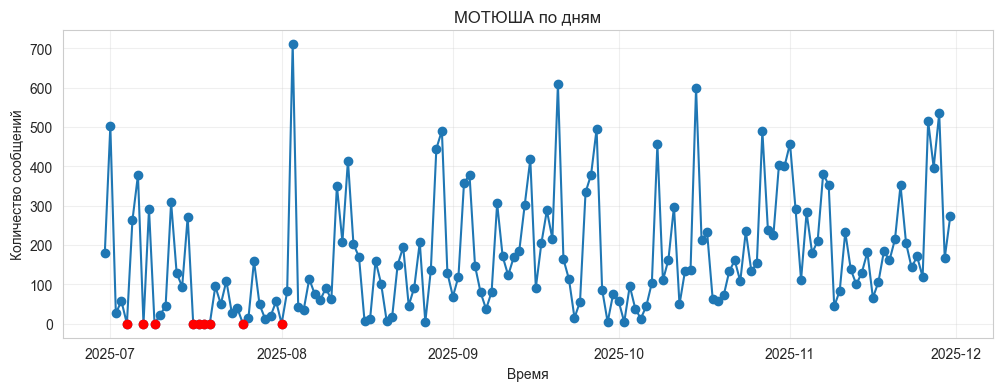

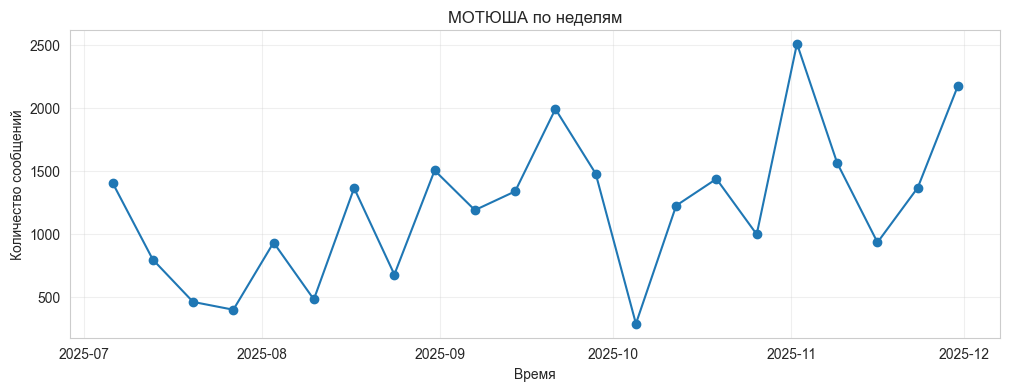

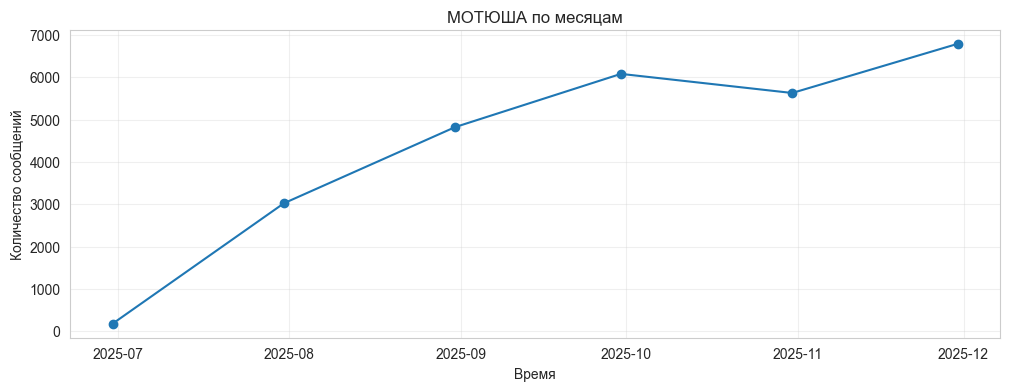

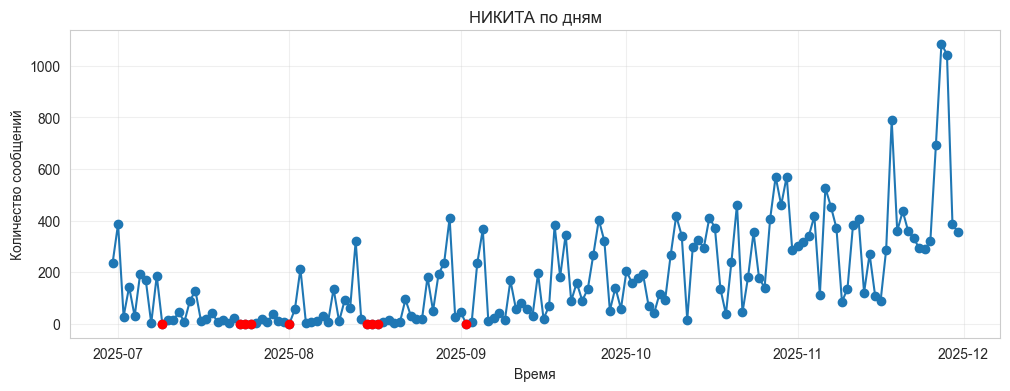

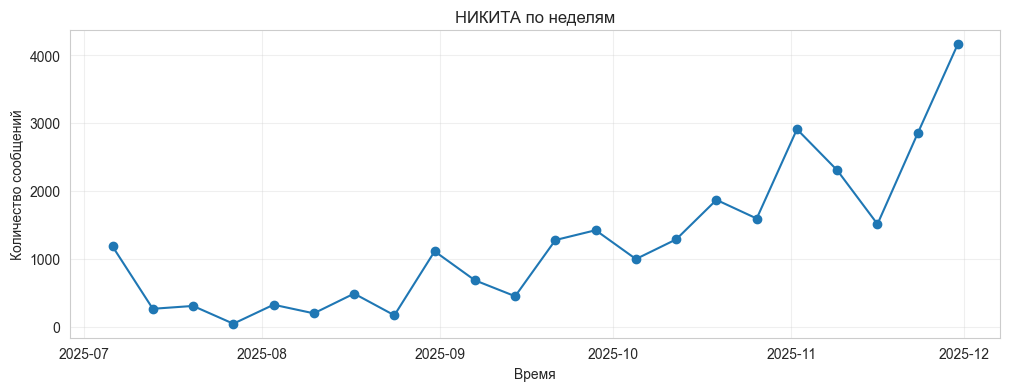

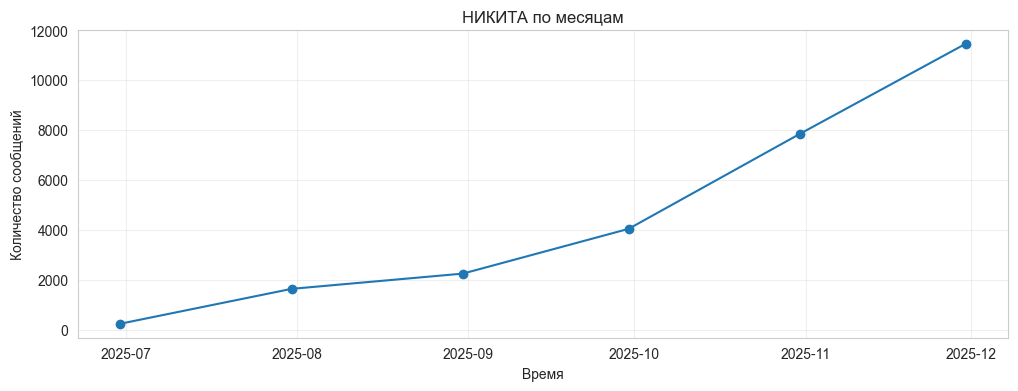

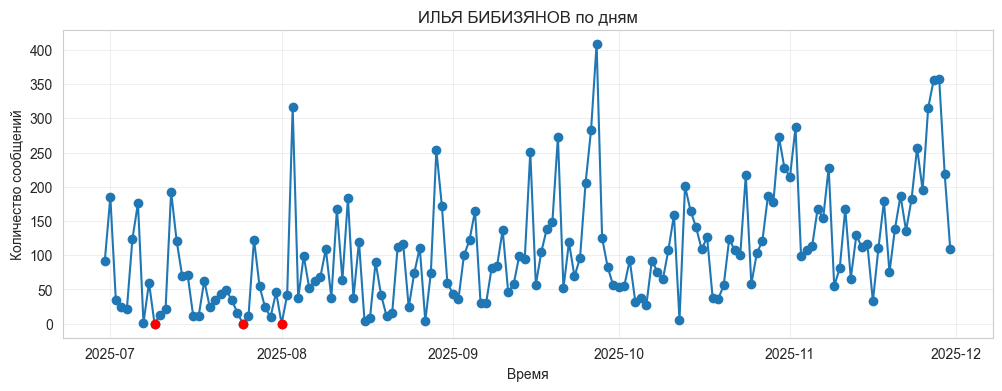

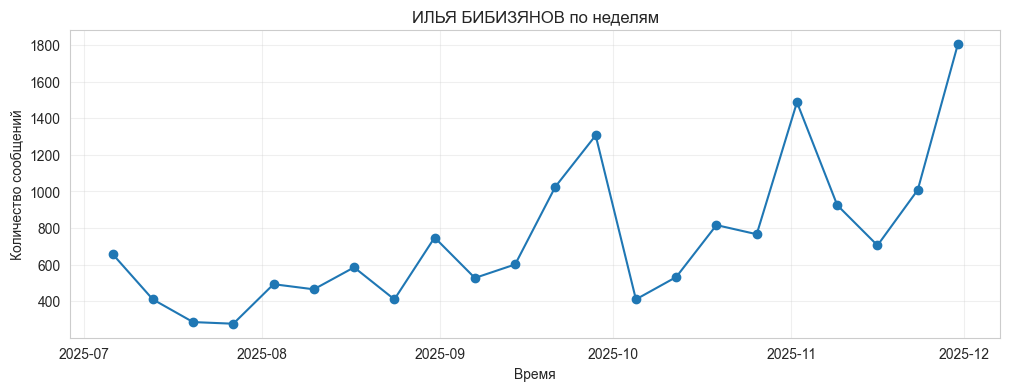

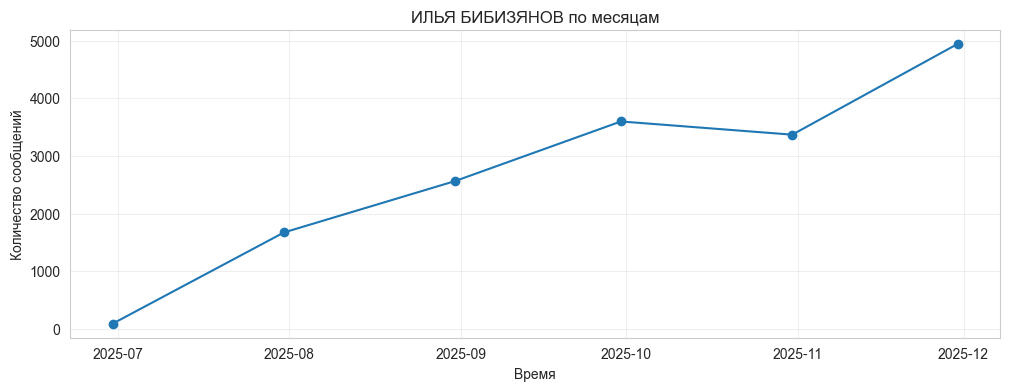

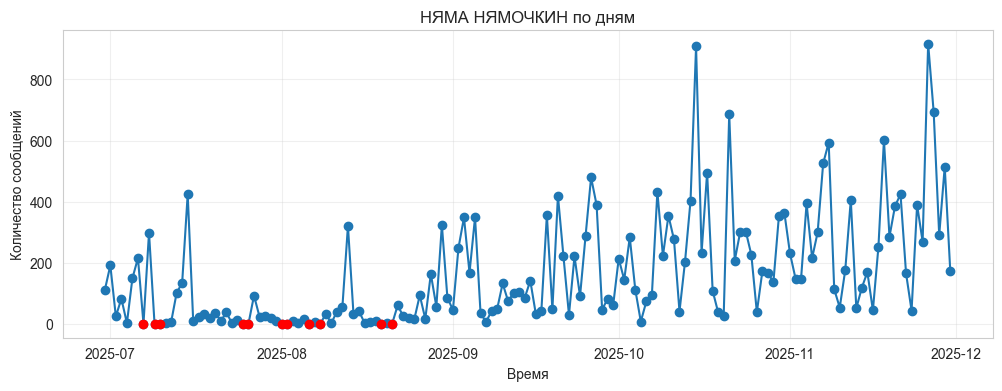

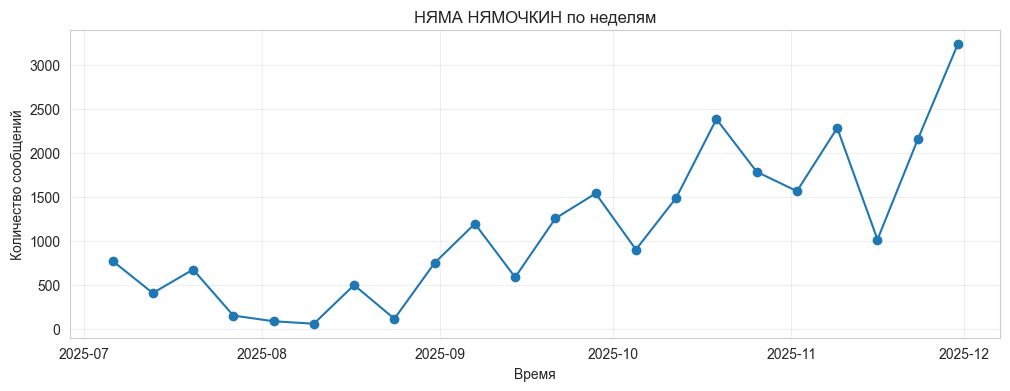

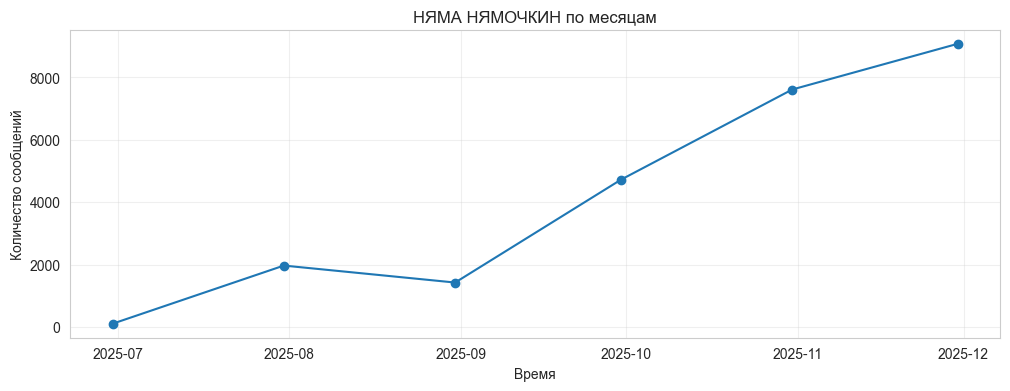

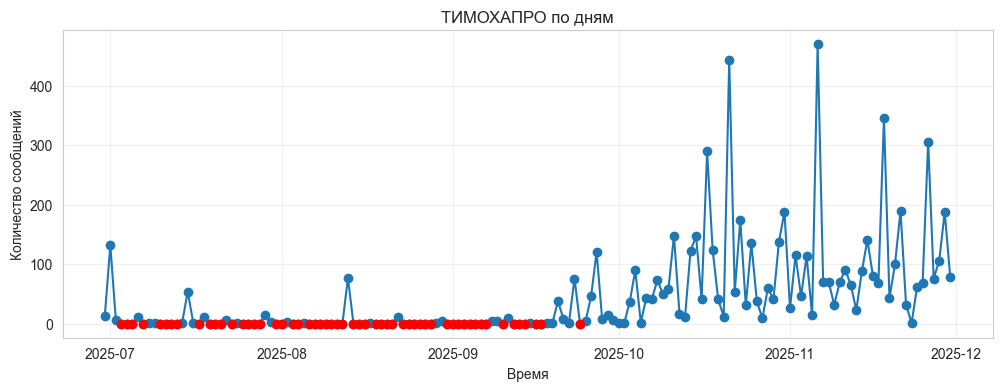

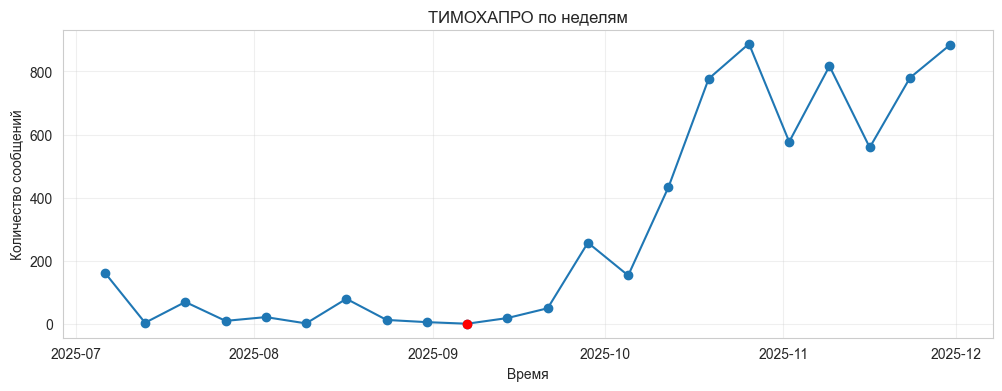

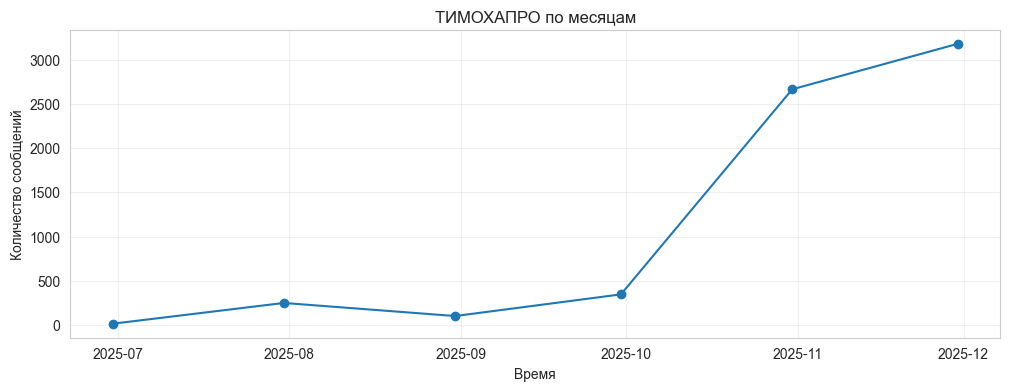

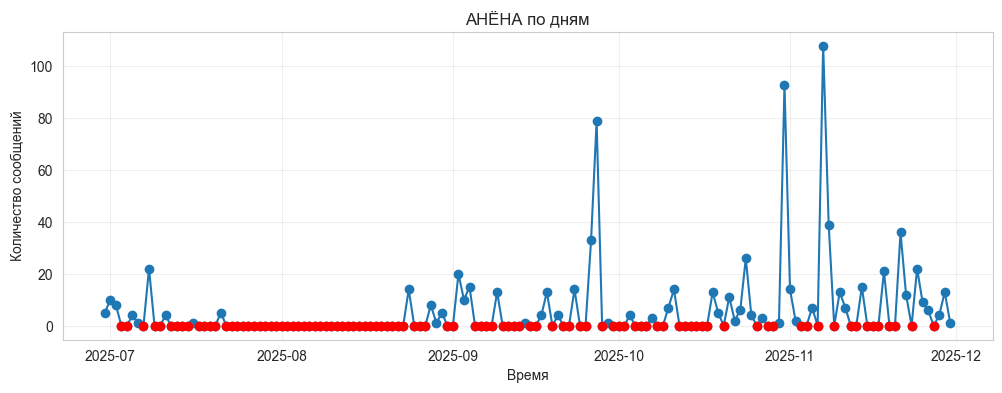

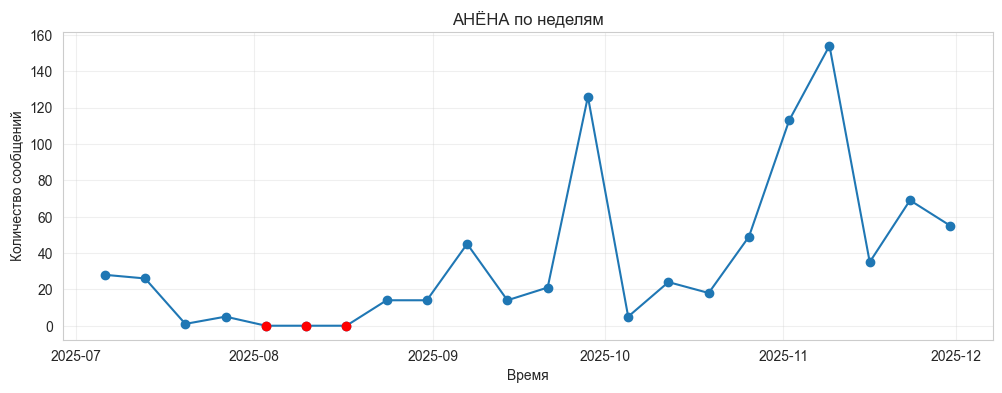

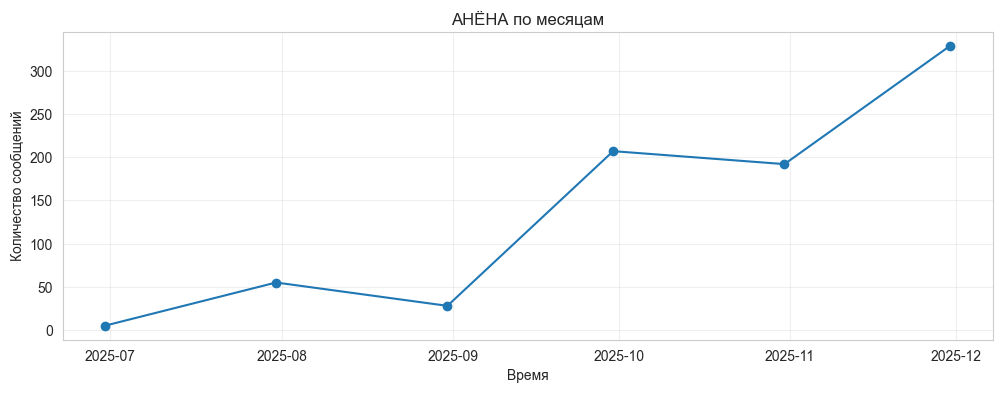

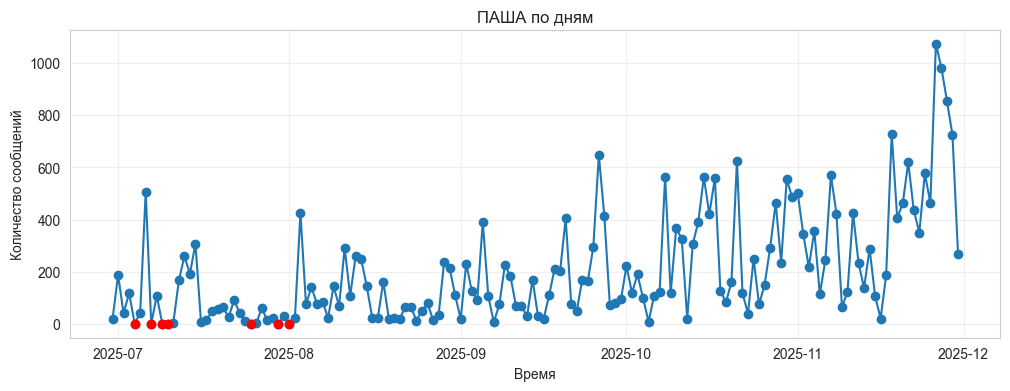

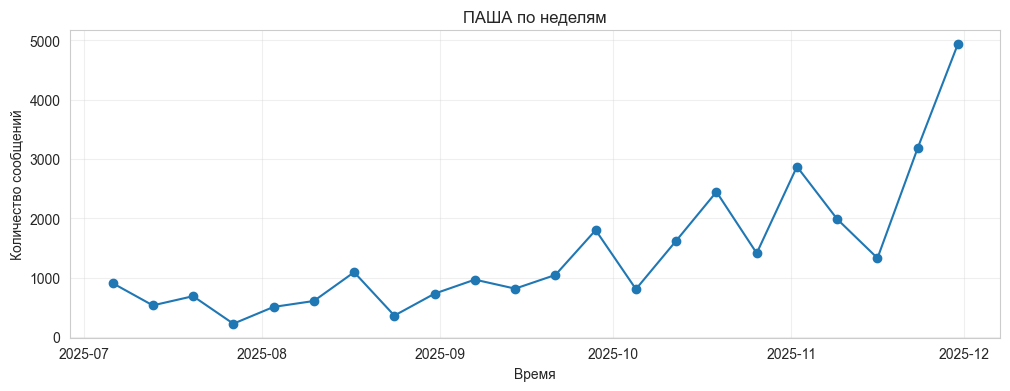

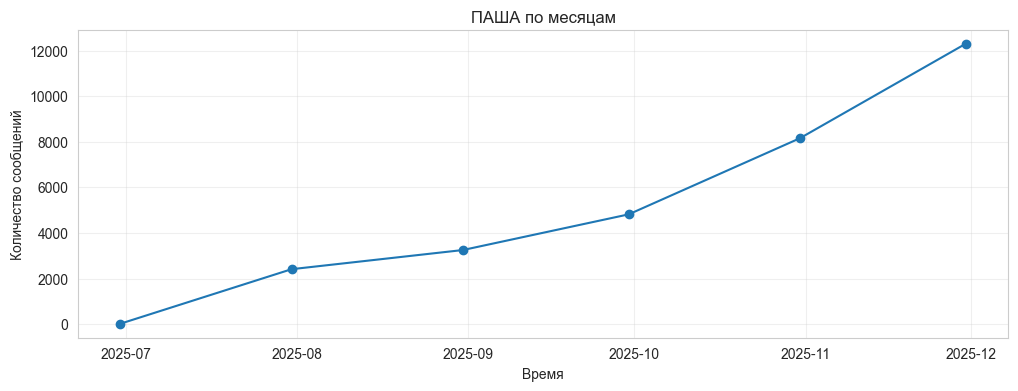

In [11]:
users = ['Мотюша', 'Никита', 'Илья Бибизянов', 'Няма Нямочкин', 'ТимохаПро', 'Анёна', 'паша']


# user = users[1]
# df_user = df[df['from'] == user]
# df_user = df[
#     (df['from'] == user) &
#     (df['date'] >= '2025-09-15') &
#     (df['date'] <= '2025-11-15')
#     ]


def plot_user_activity(df_user, freq, title):
    counts = df_user.resample(freq, on='date').size()

    plt.figure(figsize=(12, 4))
    plt.title(title)
    plt.ylabel('Количество сообщений')
    plt.xlabel('Время')
    plt.grid(True, alpha=0.3)

    plt.plot(counts.index, counts.values, marker='o', linestyle='-')

    # нули красным
    zero_mask = counts == 0
    plt.scatter(counts.index[zero_mask], counts.values[zero_mask], color='red', zorder=5)

    plt.show()


for user in users:
    df_user = df[df['from'] == user]

    plot_user_activity(df_user, 'D', f'{user.upper()} по дням')
    plot_user_activity(df_user, 'W', f'{user.upper()} по неделям')
    plot_user_activity(df_user, 'ME', f'{user.upper()} по месяцам')

    print('\n\n')

